# Nguyễn Ngọc Đạt - 11200745 

In [189]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_classification
from sklearn.datasets import make_blobs
from sklearn.datasets import make_gaussian_quantiles
from sklearn.datasets import make_multilabel_classification
from sklearn import datasets
import warnings
warnings.filterwarnings("ignore")

## Create at least three toy dataset (https://scikit-learn.org/stable/datasets/sample_generators.html), then apply GMM algorithm used sklearn library? Try different number of cluster to see how the result change? Draw the elbow and Silhouette score for the above dataset.

In [190]:
from sklearn.mixture import GaussianMixture

### The first toy dataset  

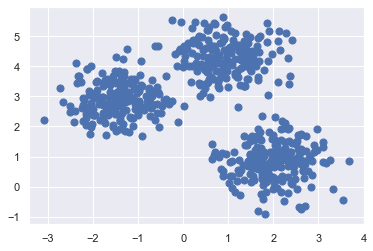

In [191]:
X, y = make_blobs(n_samples=610, centers=3, cluster_std=0.6, random_state=0)
plt.scatter(X[:, 0], X[:, 1], s=50);

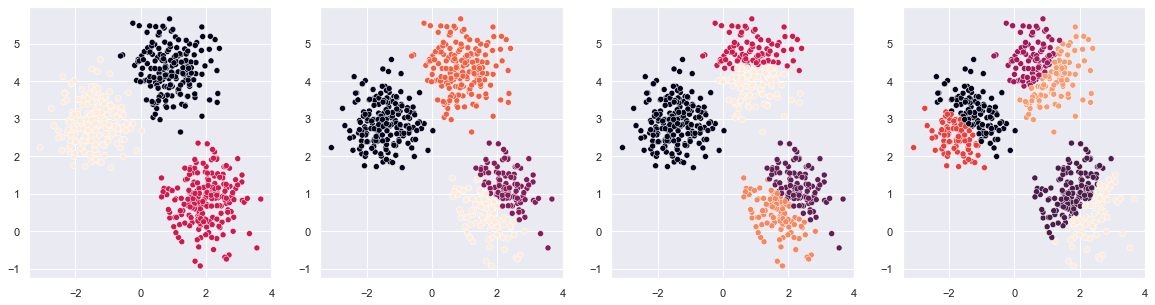

In [192]:
K = [3, 4, 5, 6]

fig, ax = plt.subplots(1,4, figsize=(20,5))
i = 0
for _k in K :
    gmm = GaussianMixture(n_components=_k).fit(X)
    labels = gmm.predict(X)
    sns.scatterplot(X[:, 0], X[:, 1], c = labels ,ax = ax[i])
        
    i+=1

plt.show()

Best K: 3


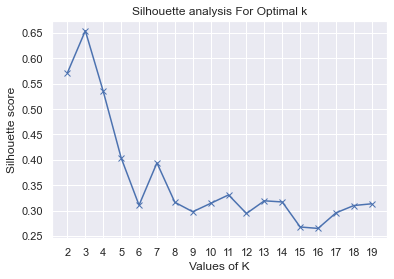

In [193]:
from sklearn.metrics import silhouette_score
silhouette_avg = []
for num_clusters in list(range(2,20)):
    gmm = GaussianMixture(n_components=num_clusters)
    labels = gmm.fit_predict(X)
    score = silhouette_score(X, labels, metric='euclidean')
    silhouette_avg.append(score)

import matplotlib.pyplot as plt
plt.plot(np.arange(2,20),silhouette_avg,'bx-')
plt.xlabel('Values of K') 
plt.ylabel('Silhouette score') 
plt.title('Silhouette analysis For Optimal k')
_ = plt.xticks(np.arange(2,20))

print (f"Best K: {np.argmax(silhouette_avg)+2}")

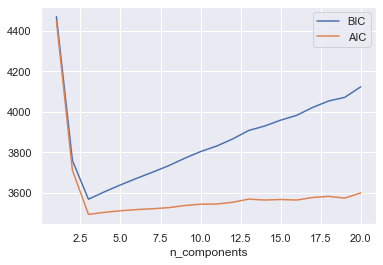

In [194]:
n_components = list(range(1, 21))
models = [GaussianMixture(n, random_state=0).fit(X)
          for n in n_components]

plt.plot(n_components, [m.bic(X) for m in models], label='BIC')
plt.plot(n_components, [m.aic(X) for m in models], label='AIC')
plt.legend(loc='best')
plt.xlabel('n_components');

### The second dataset 

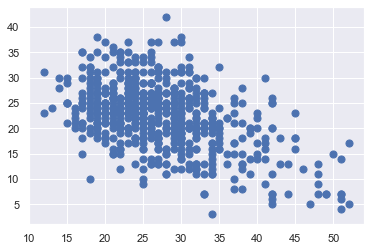

In [195]:
X, y = make_multilabel_classification(n_samples=610, n_features=2, random_state=0)
plt.scatter(X[:, 0], X[:, 1], s=50);

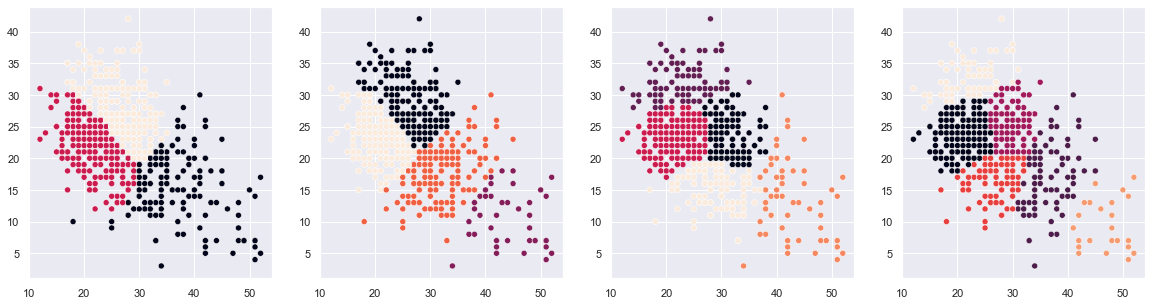

In [196]:
K = [3, 4, 5, 6]

fig, ax = plt.subplots(1,4, figsize=(20,5))
i = 0
for _k in K :
    gmm = GaussianMixture(n_components=_k).fit(X)
    labels = gmm.predict(X)
    sns.scatterplot(X[:, 0], X[:, 1], c = labels ,ax = ax[i])
        
    i+=1

plt.show()

Best K: 2


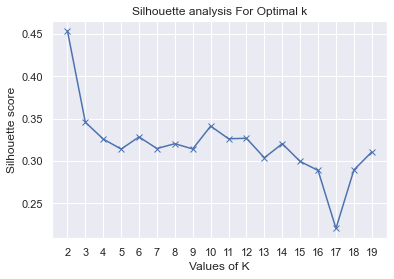

In [197]:
from sklearn.metrics import silhouette_score
silhouette_avg = []
for num_clusters in list(range(2,20)):
    gmm = GaussianMixture(n_components=num_clusters)
    labels = gmm.fit_predict(X)
    score = silhouette_score(X, labels, metric='euclidean')
    silhouette_avg.append(score)

import matplotlib.pyplot as plt
plt.plot(np.arange(2,20),silhouette_avg,'bx-')
plt.xlabel('Values of K') 
plt.ylabel('Silhouette score') 
plt.title('Silhouette analysis For Optimal k')
_ = plt.xticks(np.arange(2,20))

print (f"Best K: {np.argmax(silhouette_avg)+2}")

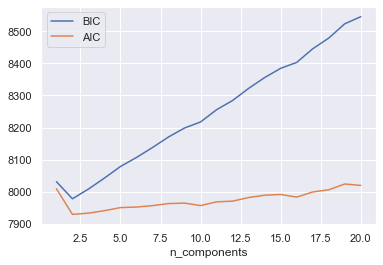

In [198]:
n_components = list(range(1, 21))
models = [GaussianMixture(n, random_state=0).fit(X)
          for n in n_components]

plt.plot(n_components, [m.bic(X) for m in models], label='BIC')
plt.plot(n_components, [m.aic(X) for m in models], label='AIC')
plt.legend(loc='best')
plt.xlabel('n_components');


### The third dataset 

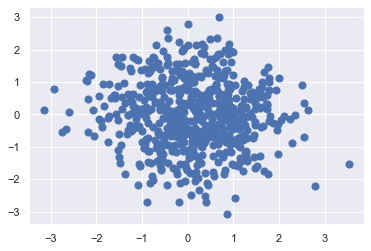

In [199]:
X, y = make_gaussian_quantiles(n_samples=610, n_features=2, n_classes=3)
plt.scatter(X[:, 0], X[:, 1], s=50);

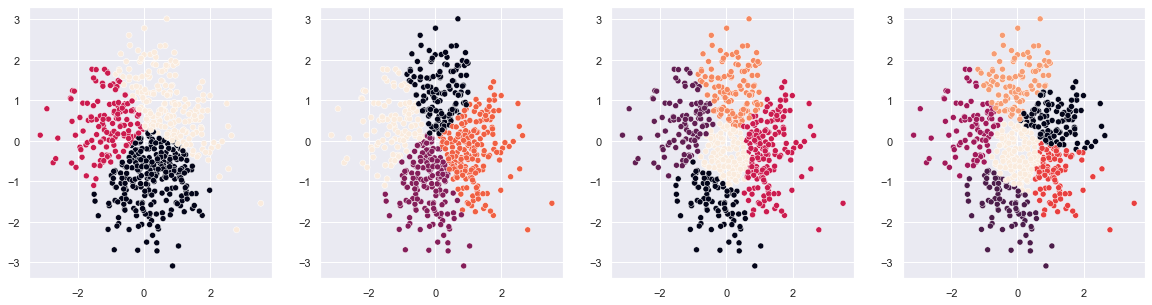

In [200]:
K = [3, 4, 5, 6]

fig, ax = plt.subplots(1,4, figsize=(20,5))
i = 0
for _k in K :
    gmm = GaussianMixture(n_components=_k).fit(X)
    labels = gmm.predict(X)
    sns.scatterplot(X[:, 0], X[:, 1], c = labels ,ax = ax[i])
        
    i+=1

plt.show()

Best K: 2


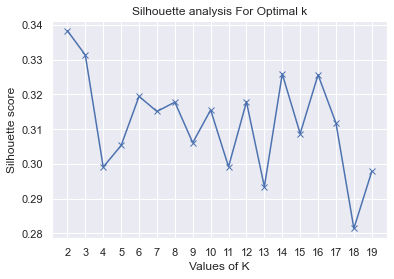

In [201]:
from sklearn.metrics import silhouette_score
silhouette_avg = []
for num_clusters in list(range(2,20)):
    gmm = GaussianMixture(n_components=num_clusters)
    labels = gmm.fit_predict(X)
    score = silhouette_score(X, labels, metric='euclidean')
    silhouette_avg.append(score)

import matplotlib.pyplot as plt
plt.plot(np.arange(2,20),silhouette_avg,'bx-')
plt.xlabel('Values of K') 
plt.ylabel('Silhouette score') 
plt.title('Silhouette analysis For Optimal k')
_ = plt.xticks(np.arange(2,20))

print (f"Best K: {np.argmax(silhouette_avg)+2}")

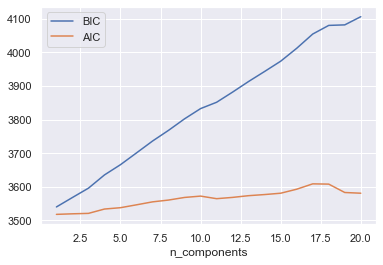

In [202]:
n_components = list(range(1, 21))
models = [GaussianMixture(n, random_state=0).fit(X)
          for n in n_components]

plt.plot(n_components, [m.bic(X) for m in models], label='BIC')
plt.plot(n_components, [m.aic(X) for m in models], label='AIC')
plt.legend(loc='best')
plt.xlabel('n_components');

## Compare kmeans and GMM (cons and pros)

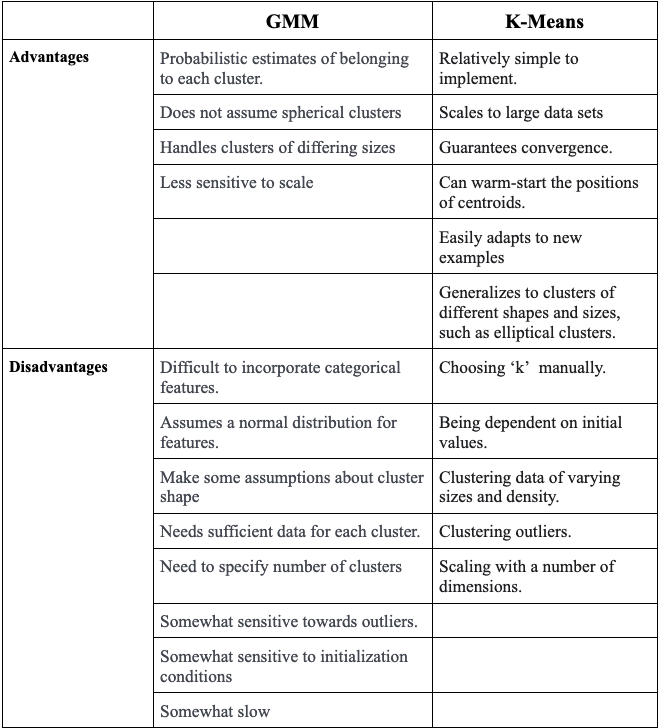

#### Advantages of Gaussian mixture models
+ Probabilistic estimates of belonging to each cluster. One of the main advantages of gaussian mixture models is that they provide estimates of the probability that each data point belongs to each cluster. This provides a lot more contextual information than the standalone cluster assignment that most other clustering algorithms provide. These probability estimates can be very useful when examining ambiguous data points that fall at the border of two clusters.
+ Does not assume spherical clusters. Another advantage that gaussian mixture models have over other models like k-means clustering is that they do not assume that all clusters are uniformly shaped spheres. Instead, gaussian mixture models can be used to accommodate clusters of varying shapes (so long as they are roughly elliptical).
+ Handles clusters of differing sizes. In addition to being able to accommodate clusters of varying shapes, gaussian mixture models can also be used to accommodate clusters of varying sizes. This provides even more flexibility in the types of clusters that can be handled.
+ Less sensitive to scale. Gaussian mixture models are generally less sensitive to scale than other clustering algorithms. That means that you may not need to rescale your variables before using them for clustering.


#### Disadvantages of GMM:
+ Difficult to incorporate categorical features. One of the main disadvantages of clustering with gaussian mixture models is that it is difficult to incorporate categorical variables. Gaussian mixture models operate under the assumption that all of your features are normally distributed, so they are not easily adapted to categorical data.
+ Assumes a normal distribution for features. In addition to being struggling with categorical features, gaussian mixture models may also struggle with numeric variables that are not normally distributed. This means that you should take some time to look at the distributions of your features before reaching for this clustering algorithm.
+ Make some assumptions about cluster shape. While gaussian mixture models are able to handle clusters of varying shapes and sizes, they do make some assumptions about the shape of the clusters. Specifically, the clusters are assumed to be elliptic. This means that gaussian mixture models will not perform as well in cases where clusters are very irregularly shaped.
+ Needs sufficient data for each cluster. Since you need to estimate a covariance matrix in order to use gaussian mixture models, you should make sure that you have enough data points in each cluster to adequately estimate the covariance. The amount of data required is not huge, but it is larger than simple algorithms that do not estimate a covariance matrix.
+ Need to specify number of clusters. Another disadvantage of gaussian mixture models is that you need to specify the number of clusters you want to use in your analysis ahead of time. This can be a non-trivial task when you do not have intuition about the number of clusters there should be.
+ Somewhat sensitive towards outliers. Since gaussian mixture models operate under the assumption that your features are normally distributed, they can be thrown off by cases where there are many outliers in the data. That being said, some implementations of gaussian mixture models allow for outliers to be separated out into a separate cluster.
+ Somewhat sensitive to initialization conditions. Gaussian mixture models are somewhat sensitive to initialization conditions of the algorithm such as the seed that is used and the starting points that are used for cluster centers. This means you may get different results if you run the algorithm multiple times.
+ Somewhat slow. One final disadvantage of gaussian mixture models is that they tend to be slower than similar clustering algorithms like k-means clustering. This is especially true when there are many features in your dataset.


#### Advantages of K-means
+ Relatively simple to implement.
+ Scales to large data sets.
+ Guarantees convergence.
+ Can warm-start the positions of centroids.
+ Easily adapts to new examples.
+ Generalizes to clusters of different shapes and sizes, such as elliptical clusters.

#### Disadvantages of K-means
+ Choosing 'k' manually
+ Being dependent on initial values.
+ Clustering data of varying sizes and density.
+ Clustering outliers.Centroids can be dragged by outliers, or outliers might get their own cluster instead of being ignored. Consider removing or clipping outliers before clustering.
+ Scaling with number of dimensions.As the number of dimensions increases, a distance-based similarity measure converges to a constant value between any given examples. Reduce dimensionality either by using PCA on the feature data, or by using “spectral clustering” to modify the clustering algorithm as explained below.

## Find 3 examples that GMM is better than kmeans

### The first example 

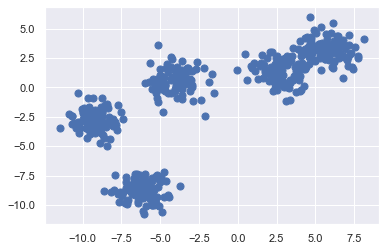

In [203]:
X, y_true = make_blobs(
    n_samples=500, centers=5,
    cluster_std=0.9, random_state=17
)
plt.scatter(X[:, 0], X[:, 1], s=50);

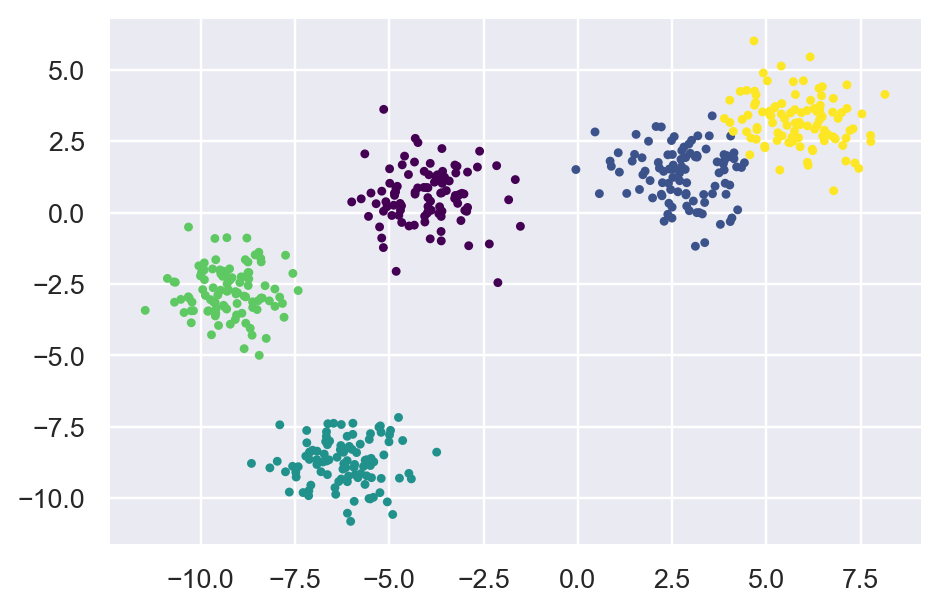

In [204]:
kmeans= KMeans(5, random_state=420)
labels = kmeans.fit(X).predict(X)
plt.figure(dpi=175)
plt.scatter(X[ : , 0], X[ : , 1], c=labels, s=7, cmap='viridis')

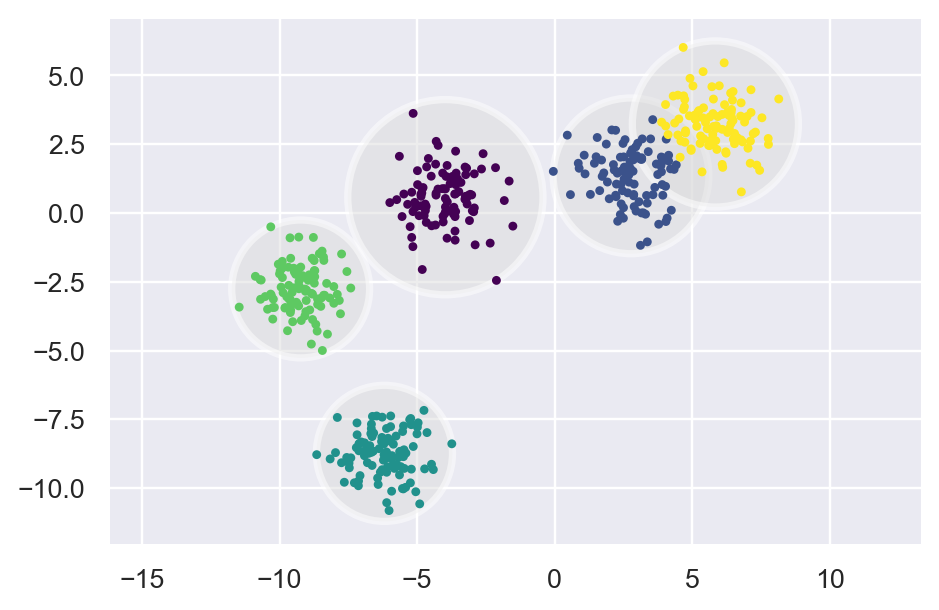

In [205]:
from scipy.spatial.distance import cdist

def plot_kmeans(kmeans, X, ax=None):
    labels = kmeans.fit_predict(X)

    # plot the input data
    plt.figure(dpi=175)
    ax = ax or plt.gca()
    ax.axis('equal')
    ax.scatter(X[:, 0], X[:, 1], c=labels, s=7, cmap='viridis', zorder=2)

    # plot the representation of the k-means model
    centers = kmeans.cluster_centers_
    radii = [
        cdist(X[labels == i], [center]).max()
        for i, center in enumerate(centers)
    ]
    for c, r in zip(centers, radii):
        ax.add_patch(plt.Circle(
            c, r, fc='#DDDDDD', lw=3, alpha=0.5, zorder=1
        ))


kmeans = KMeans(n_clusters=5, random_state=420)
plot_kmeans(kmeans, X)

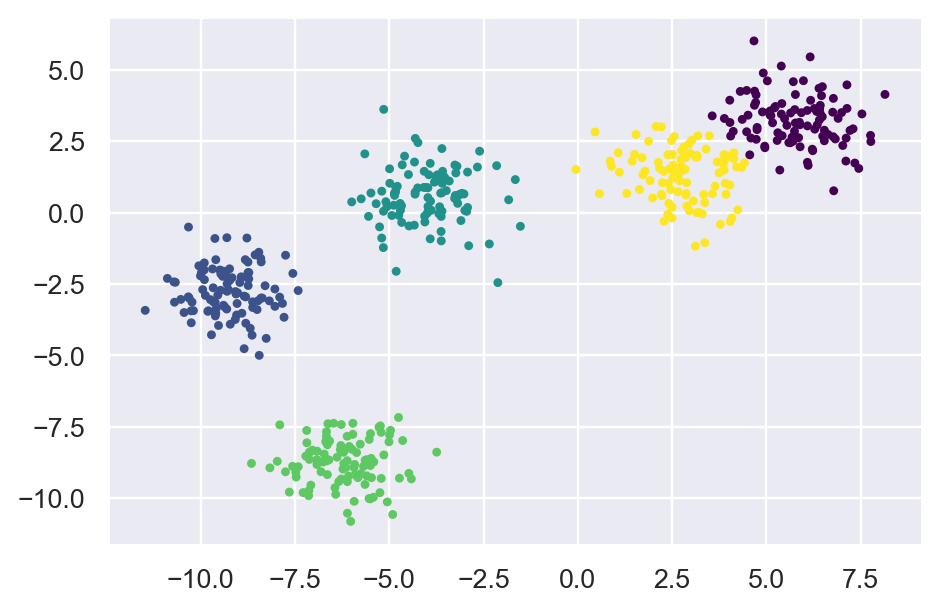

In [206]:
from sklearn.mixture import GaussianMixture

gmm = GaussianMixture(n_components=5).fit(X)
labels = gmm.predict(X)
plt.figure(dpi=175)
plt.scatter(X[ : , 0], X[ : , 1], c=labels, s=7, cmap='viridis')

In [207]:
from matplotlib.patches import Ellipse

def plot_gmm(gmm, X, label=True, ax=None):
    def draw_ellipse(position, covariance, ax=None, **kwargs):
        ax = ax or plt.gca()

        if covariance.shape == (2, 2):
            U, s, Vt = np.linalg.svd(covariance)
            angle = np.degrees(np.arctan2(U[1, 0], U[0, 0]))
            width, height = 2 * np.sqrt(s)
        else:
            angle = 0
            width, height = 2 * np.sqrt(covariance)

        for nsig in range(1, 4):
            ax.add_patch(Ellipse(
                position, nsig * width, nsig * height,
                angle, **kwargs
            ))
    
    ax = ax or plt.gca()
    labels = gmm.fit(X).predict(X)
    if label:
        ax.scatter(X[:, 0], X[:, 1], c=labels, s=7, cmap='viridis', zorder=2) 
    else:
        ax.scatter(X[:, 0], X[:, 1], s=7, zorder=2)
    
    ax.axis('equal')
    w_factor = 0.2 / gmm.weights_.max()
    for pos, covar, w in zip(gmm.means_, gmm.covariances_, gmm.weights_):
        draw_ellipse(pos, covar, alpha=w * w_factor)

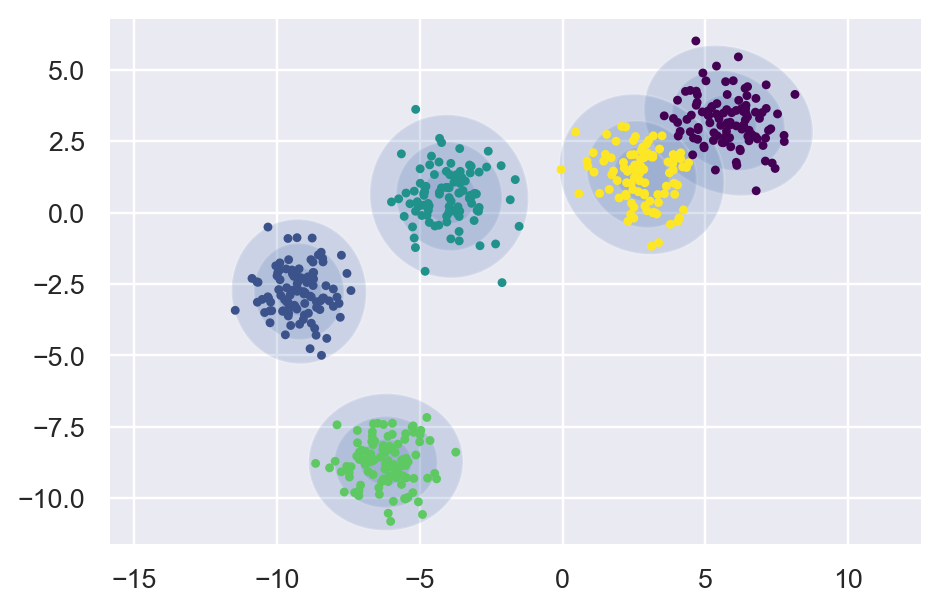

In [208]:
gmm = GaussianMixture(n_components=5, random_state=420)
plt.figure(dpi=175)
plot_gmm(gmm, X)

### The second example

In [220]:
X, y_true = make_blobs(n_samples=400, centers=4, cluster_std=0.60, random_state=0)
X = X[:, ::-1] # flip axes for better plotting

rng = np.random.RandomState(13)
X_stretched = np.dot(X, rng.randn(2, 2))

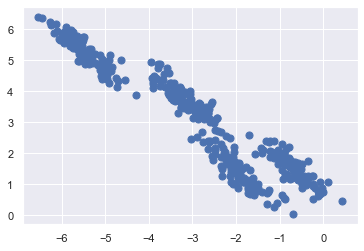

In [221]:
plt.scatter(X_stretched[:, 0], X_stretched[:, 1], s=50);

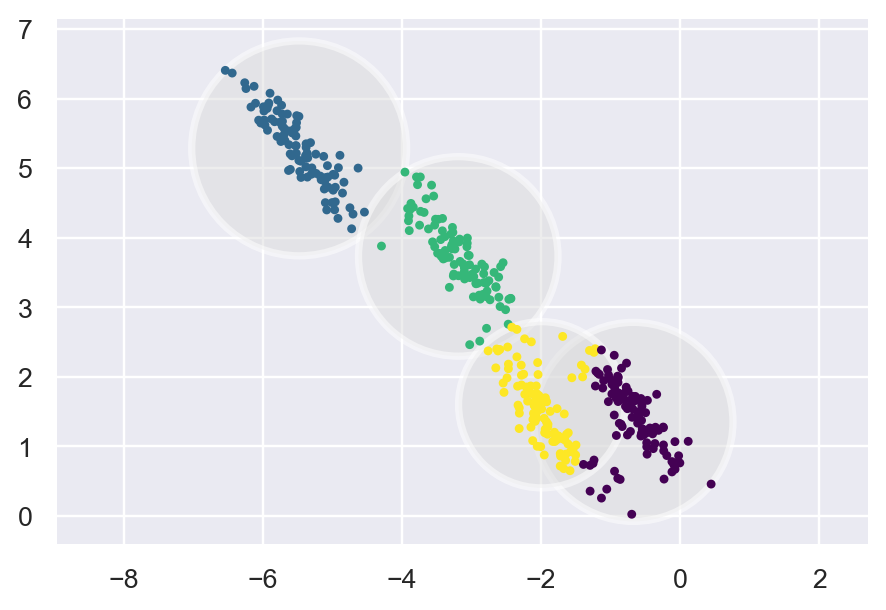

In [210]:
kmeans = KMeans(n_clusters=4, random_state=0)
plot_kmeans(kmeans, X_stretched)

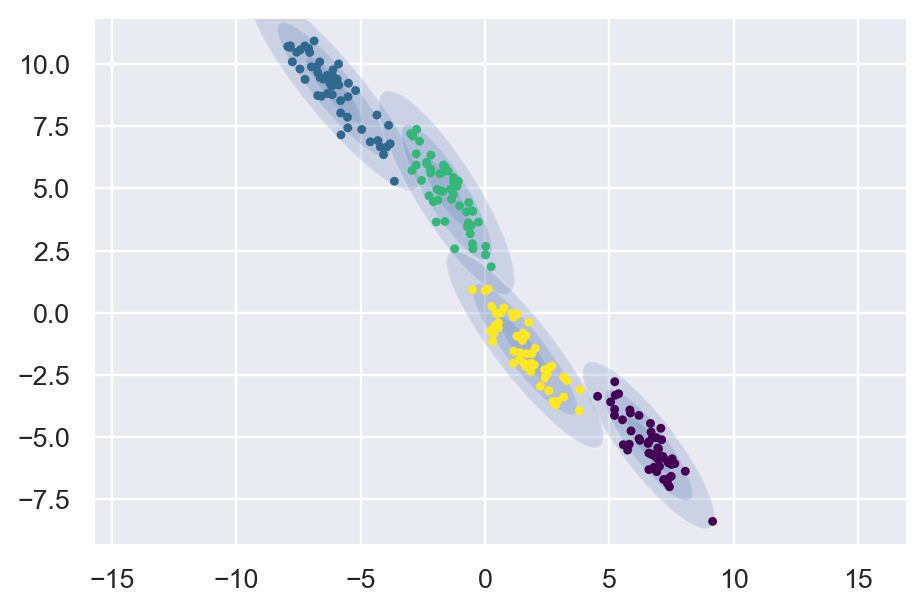

In [216]:
gmm = GaussianMixture(n_components=4, covariance_type='full', random_state=42)
plt.figure(dpi=175)
plot_gmm(gmm, X_stretched)

### The third example

In [222]:
X1, y1 = make_blobs(n_samples=200, centers=4, cluster_std=1.5, random_state=20)

rng = np.random.RandomState(13)
X_stretched = np.dot(X1, rng.randn(2, 2))

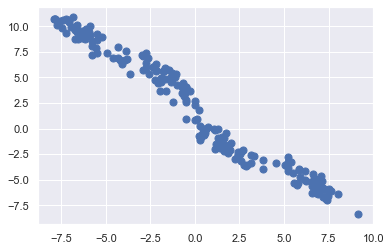

In [223]:
plt.scatter(X_stretched[:, 0], X_stretched[:, 1], s=50);

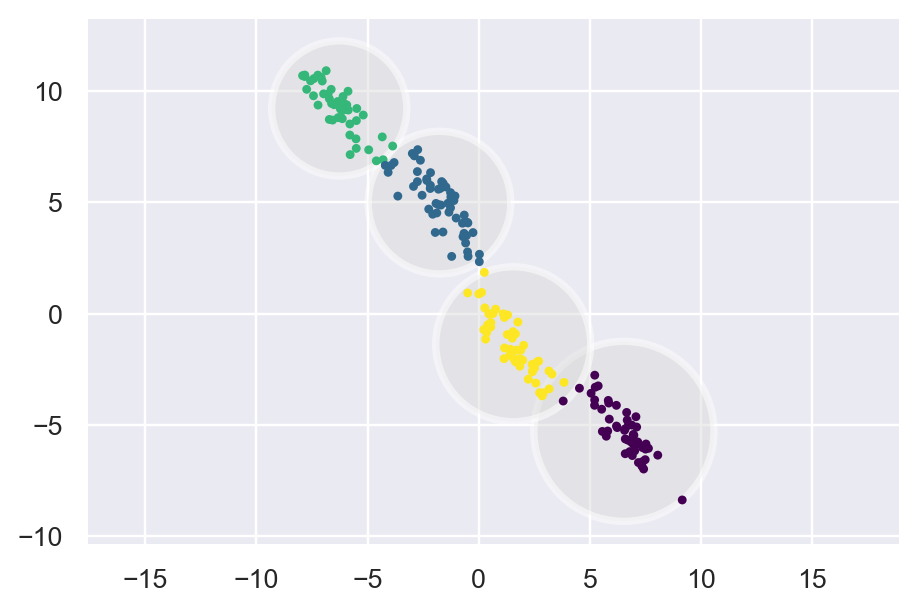

In [224]:
kmeans = KMeans(n_clusters=4, random_state=0)
plot_kmeans(kmeans, X_stretched)

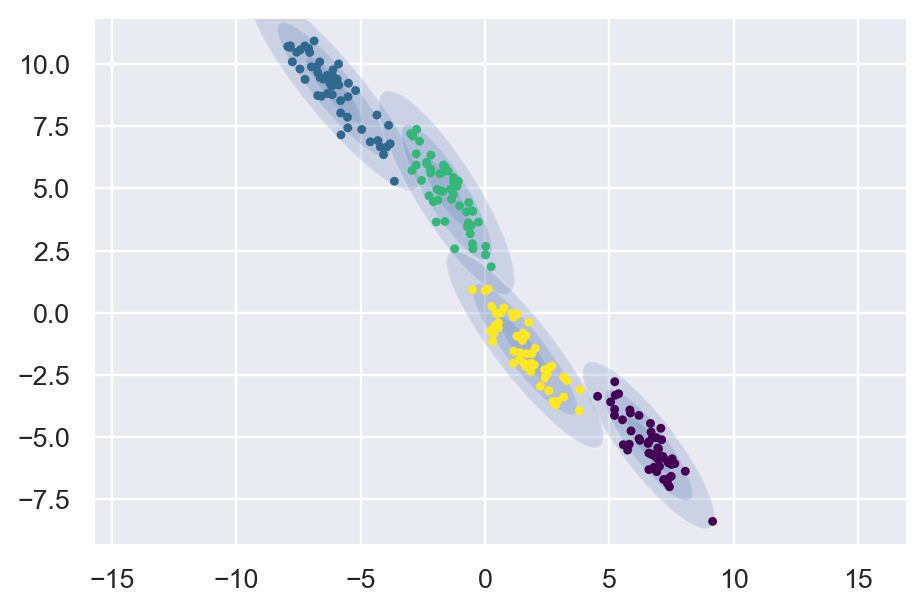

In [225]:
gmm = GaussianMixture(n_components=4, covariance_type='full', random_state=42)
plt.figure(dpi=175)
plot_gmm(gmm, X_stretched)